In [1]:
# import yfinance as yf
#
# crude_oil = "CL=F"
# start_date = "2000-01-01"
# end_date = "2023-01-01"
#
# df = yf.download(crude_oil, start = start_date, end = end_date)
#
# df.describe()

In [2]:
import pandas as pd
start_date = "2016-06-23"
end_date = "2023-05-30"
df = pd.read_csv("crudeoil.csv")
df.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'crudeoil.csv'

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-23,49.080002,50.230000,49.080002,50.110001,50.110001,401885
2016-06-24,50.299999,50.450001,46.700001,47.639999,47.639999,649446
2016-06-27,47.810001,47.959999,45.830002,46.330002,46.330002,504613
2016-06-28,46.590000,48.180000,46.540001,47.849998,47.849998,498851
2016-06-29,48.060001,50.000000,47.980000,49.880001,49.880001,511476
...,...,...,...,...,...,...
2023-05-23,72.099998,73.790001,71.709999,72.910004,72.910004,317586
2023-05-24,73.769997,74.730003,73.129997,74.339996,74.339996,386611
2023-05-25,74.209999,74.370003,70.980003,71.830002,71.830002,422637


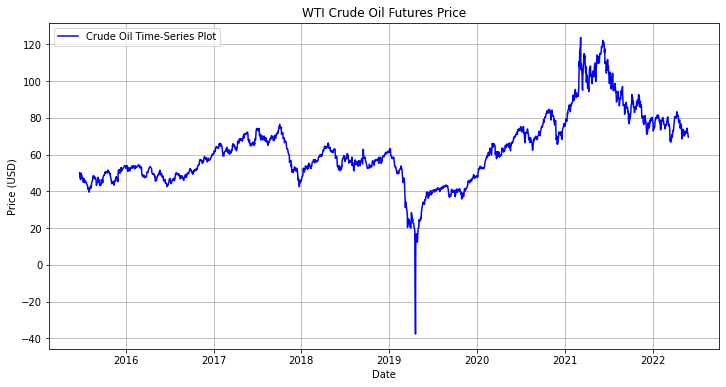

In [10]:
import matplotlib.pyplot as plt 

#原油期货价格

plt.figure(figsize = (12, 6))
plt.plot( df.index,df['Close'], label = 'Crude Oil Time-Series Plot', color = 'blue')
plt.title('WTI Crude Oil Futures Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.show()


<Figure size 720x288 with 0 Axes>

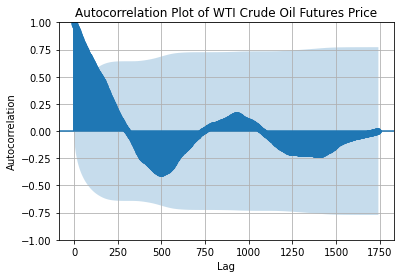

In [13]:
# AUTO CORRELATION 

import statsmodels.api as sm

# Assuming you have a DataFrame df with a 'Close' column
# You can replace 'Close' with the specific column you want to analyze

# WTI原油期货的收盘价自相关函数图形。自相关是时间序列数据与其自身在不同滞后（lags）下的相关性。
# 自相关度量的是一个时间序列与其自身在不同滞后值时的相关性。例如，滞后为1的自相关将比较时间t和t-1的数据，滞后为2的自相关将比较时间t和t-2的数据，依此类推。
# 绘制自相关图: 使用sm.graphics.tsa.plot_acf函数绘制自相关图。这个图显示了各种滞后值（从0到数据长度减1）对应的自相关值。alpha=0.05参数表示绘制的置信区间是95%（1-0.05）。

# Calculate the autocorrelation function (ACF)
acf = sm.tsa.acf(df['Close'], fft=False)

# Create the autocorrelation plot
plt.figure(figsize=(10, 4))
sm.graphics.tsa.plot_acf(df['Close'], lags=len(df)-1, alpha=0.05)
plt.title('Autocorrelation Plot of WTI Crude Oil Futures Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

# Show the plot
plt.show()

<Figure size 576x432 with 0 Axes>

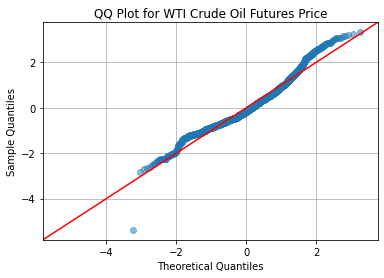

In [14]:
# QQ plot Quantile-Quantile Plot
import numpy as np

# Assuming you have a DataFrame df with a 'Close' column
# You can replace 'Close' with the specific column you want to analyze

# Quantile-Quantile图（通常称为QQ图），比较WTI原油期货价格的分布与理论的正态分布之间的差异。
"""
Quantile-Quantile图 (QQ图): QQ图是一种用于比较两个概率分布的图形化工具。
通常，其中一个分布是你的数据，而另一个分布是一个理论分布（在这种情况下是正态分布）。
该图的每个点代表数据集和理论分布的特定分位数。如果两者分布相同，则点会沿45度线对齐。

生成理论的正态分布: 使用给定时间序列数据的平均值和标准偏差，生成一个与数据相同大小的理论的正态分布样本。这为QQ图提供了比较的基础。

关于原油价格的备注: 代码的最后有一个注释，提到原油价格接近正态分布，但是“fat-tailed”。
这意味着虽然价格大部分情况下接近正态分布，但在尾部（即极端值）有更多的观测值，比正态分布预期的要多。
这是许多金融时间序列的一个常见特点，尤其是当涉及到资产价格的大幅波动时。
"""
# Generate a theoretical normal distribution for comparison
mean, std_dev = np.mean(df['Close']), np.std(df['Close'])
theoretical_normal = np.random.normal(loc=mean, scale=std_dev, size=len(df))

# Create the QQ plot
plt.figure(figsize=(8, 6))
sm.qqplot(df['Close'], line='45', fit=True, marker='o', alpha=0.5)
plt.title('QQ Plot for WTI Crude Oil Futures Price')
plt.grid(True)

# Show the plot
plt.show()

# it shows that the crude oil is close to normal distribution, but fat-tailed

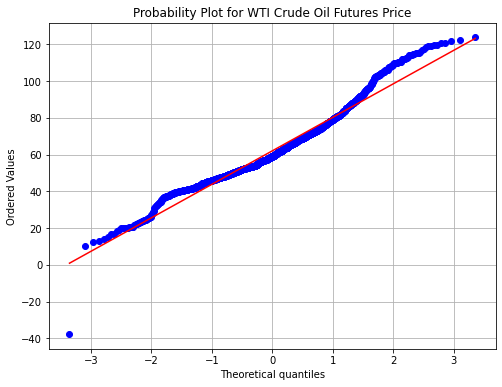

In [15]:
# PP plot - probability plot 
import scipy.stats as stats
# 创建一个概率图（也称为PP图，或Probability Plot），用于评估WTI原油期货价格是否遵循某一理论分布，通常是正态分布。

# Create the probability plot
plt.figure(figsize=(8, 6))
stats.probplot(df['Close'], plot=plt)
plt.title('Probability Plot for WTI Crude Oil Futures Price')
plt.grid(True)

# Show the plot
plt.show()

/root/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


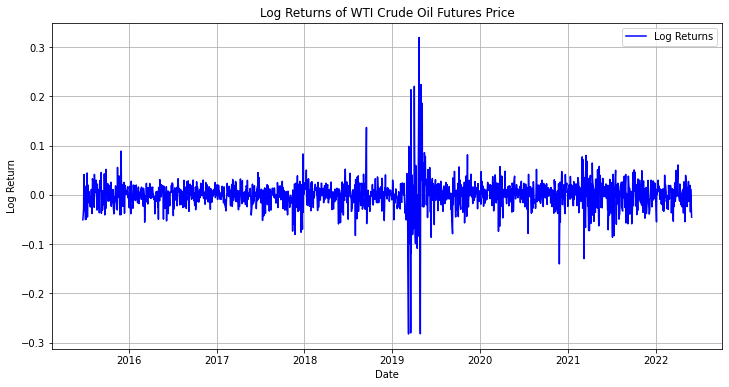

In [16]:
# Log return - shows periodic volatility 
import pandas as pd

df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))  #log_return = today_price / yesterday_price 


# 计算WTI原油期货价格的对数收益率并绘制其时间序列图。对数收益率是金融领域常用的一个指标，可以反映资产价格变化的百分比

# Drop rows with NaN values (resulting from the shift operation)
df = df.dropna()

# Create a time series plot of the log returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Log_Return'], label='Log Returns', color='blue')
plt.title('Log Returns of WTI Crude Oil Futures Price')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


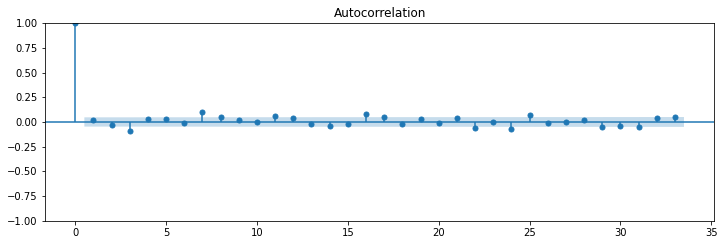

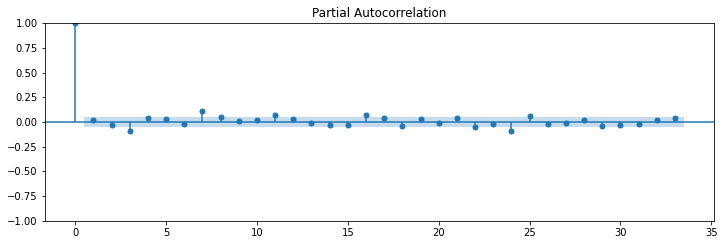

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
"""
为WTI原油期货价格的对数收益率绘制自相关函数(ACF)和偏自相关函数(PACF)的图形。
ACF和PACF都是时间序列分析中的关键工具，用于理解时间序列数据的相关性结构。
"""

fig = plt.figure(figsize = (12,8))
axis1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Log_Return'], ax=axis1)

fig = plt.figure(figsize = (12,8))
axis2 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(df['Log_Return'], ax = axis2)


In [18]:
from statsmodels.tsa.arima.model import ARIMA 
import warnings
warnings.filterwarnings('ignore')

model = ARIMA(df['Log_Return'], order = (0,0,0))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                 1740
Model:                          ARIMA   Log Likelihood                3594.416
Date:                Sun, 01 Oct 2023   AIC                          -7184.832
Time:                        19:58:25   BIC                          -7173.909
Sample:                             0   HQIC                         -7180.793
                               - 1740                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.719      0.472      -0.001       0.002
sigma2         0.0009   8.56e-06    109.814      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.40   Jarque-

In [19]:
import warnings
#搜寻最好的参数

warnings.filterwarnings('ignore')

p_range = range(5)
q_range = range(4)
d_range = range(3)
best_aic = 0 
best_order = None 

for p in p_range:
    for q in q_range:
        for d in d_range:
            model = ARIMA(df['Log_Return'], order = (p,d,q))
            model_fit = model.fit()
            aic_temp = model_fit.aic
            if aic_temp < best_aic:
                best_order = model.order
                best_aic = aic_temp
    
print('Best AIC: ' + str(best_aic))
print('Best ARIMA model: ' + str(best_order))


Best AIC: -7203.054783305777
Best ARIMA model: (4, 0, 2)


In [43]:
#使用最佳的参数进行拟合
model = ARIMA(df['Log_Return'], order = (4,0,2))
results = model.fit()

In [44]:
#star 和 end 是用序号
results.predict(star=1,end=len(df)-1,dynamic=True)

Date
2016-06-24    0.000538
2016-06-27    0.000538
2016-06-28    0.000538
2016-06-29    0.000538
2016-06-30    0.000538
                ...   
2023-05-23    0.000538
2023-05-24    0.000538
2023-05-25    0.000538
2023-05-26    0.000538
2023-05-30    0.000538
Name: predicted_mean, Length: 1740, dtype: float64

In [45]:
from datetime import datetime
#预测 
F_log = results.predict(dynamic=True)
df['Forcast_log'] = F_log.values

df

,Open,High,Low,Close,Adj Close,Volume,Log_Return,Forcast_log,Forcast_Price
Date,,,,,,,,,
2016-06-24,50.299999,50.450001,46.700001,47.639999,47.639999,649446,-0.050548,0.000538,NaN
2016-06-27,47.810001,47.959999,45.830002,46.330002,46.330002,504613,-0.027883,0.000538,47.665643
2016-06-28,46.590000,48.180000,46.540001,47.849998,47.849998,498851,0.032281,0.000538,46.354941
2016-06-29,48.060001,50.000000,47.980000,49.880001,49.880001,511476,0.041549,0.000538,47.875756
2016-06-30,49.549999,49.619999,48.169998,48.330002,48.330002,508736,-0.031568,0.000538,49.906851
...,...,...,...,...,...,...,...,...,...
2023-05-23,72.099998,73.790001,71.709999,72.910004,72.910004,317586,0.012699,0.000538,72.028749
2023-05-24,73.769997,74.730003,73.129997,74.339996,74.339996,386611,0.019423,0.000538,72.949250
2023-05-25,74.209999,74.370003,70.980003,71.830002,71.830002,422637,-0.034347,0.000538,74.380013


In [46]:
# 使用公式df['Close'].shift(1) * np.exp(df['Forcast_log'])来从log return计算预测的价格。
# df['Close'].shift(1)：这是前一天的收盘价。
# np.exp(df['Forcast_log'])：这将log return转换为一个简单的价格倍数。

df['Forcast_Price'] = df['Close'].shift(1) * np.exp(df['Forcast_log'])

<AxesSubplot:xlabel='Date'>

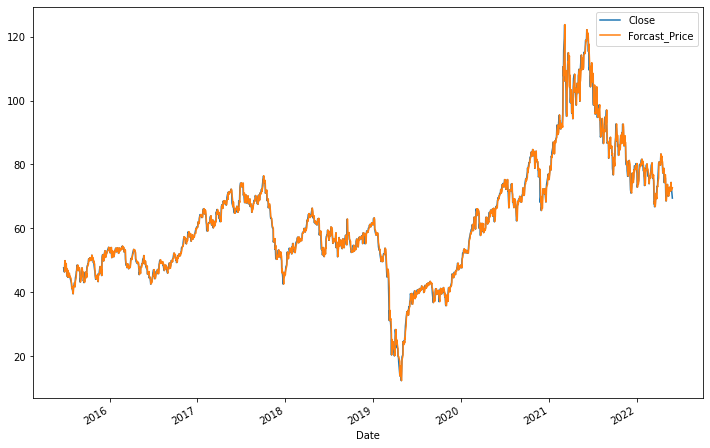

In [47]:
df[['Close', 'Forcast_Price']].plot(figsize=(12,8))

In [125]:
from pandas.tseries.offsets import DateOffset
future_dates = pd.to_datetime([df.index[-1] + DateOffset(days=x) for x in range(0,370)])
future_dates

DatetimeIndex(['2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02',
               '2023-06-03', '2023-06-04', '2023-06-05', '2023-06-06',
               '2023-06-07', '2023-06-08',
               ...
               '2024-05-24', '2024-05-25', '2024-05-26', '2024-05-27',
               '2024-05-28', '2024-05-29', '2024-05-30', '2024-05-31',
               '2024-06-01', '2024-06-02'],
              dtype='datetime64[ns]', length=370, freq=None)

In [126]:
future_datest_df = pd.DataFrame(index=future_dates[1:], columns = df.columns)
future_datest_df

,Open,High,Low,Close,Adj Close,Volume,Log_Return,Forcast_log,Forcast_Price
2023-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
future_df = pd.concat([df, future_datest_df])
future_df

,Open,High,Low,Close,Adj Close,Volume,Log_Return,Forcast_log,Forcast_Price
2016-06-24,50.299999,50.450001,46.700001,47.639999,47.639999,649446,-0.050548,0.000538,NaN
2016-06-27,47.810001,47.959999,45.830002,46.330002,46.330002,504613,-0.027883,0.000538,47.665643
2016-06-28,46.590000,48.180000,46.540001,47.849998,47.849998,498851,0.032281,0.000538,46.354941
2016-06-29,48.060001,50.000000,47.980000,49.880001,49.880001,511476,0.041549,0.000538,47.875756
2016-06-30,49.549999,49.619999,48.169998,48.330002,48.330002,508736,-0.031568,0.000538,49.906851
...,...,...,...,...,...,...,...,...,...
2024-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
from datetime import datetime

# 定义起始日期和结束日期
start_date = datetime(2022, 12, 31)
end_date = datetime(2023, 11, 4)

# 计算日期差距
days_between = (end_date - start_date).days

# 打印结果
print("从'2022-12-31'到'2023-11-04'之间的天数是:", days_between)

从'2022-12-31'到'2023-11-04'之间的天数是: 308


In [129]:
from datetime import datetime, timedelta

# 生成时间列表（只包含年月日）
time_list = []
current_date = start_date
while current_date <= end_date:
    time_list.append(current_date.strftime('%Y-%m-%d'))
    current_date += timedelta(days=1)

In [130]:
# 使用forecast方法进行未来的单一点预测，指定预测步数（steps）
forecasted_value = results.forecast(steps=309)
# 将 forecasted_value 的索引替换为 time_list
forecasted_value.index = time_list
forecasted_value.index = pd.to_datetime(forecasted_value.index)
forecasted_value.rename('Forcast_log', inplace=True)
forecasted_value

2022-12-31    0.002454
2023-01-01   -0.000985
2023-01-02    0.004547
2023-01-03    0.000317
2023-01-04   -0.002150
                ...   
2023-10-31    0.000538
2023-11-01    0.000538
2023-11-02    0.000538
2023-11-03    0.000538
2023-11-04    0.000538
Name: Forcast_log, Length: 309, dtype: float64

In [131]:
# 使用 combine_first 更新 future_df 中的 Forcast_log 列
future_df['Forcast_log'] = future_df['Forcast_log'].combine_first(forecasted_value)
future_df

,Open,High,Low,Close,Adj Close,Volume,Log_Return,Forcast_log,Forcast_Price
2016-06-24,50.299999,50.450001,46.700001,47.639999,47.639999,649446,-0.050548,0.000538,NaN
2016-06-27,47.810001,47.959999,45.830002,46.330002,46.330002,504613,-0.027883,0.000538,47.665643
2016-06-28,46.590000,48.180000,46.540001,47.849998,47.849998,498851,0.032281,0.000538,46.354941
2016-06-29,48.060001,50.000000,47.980000,49.880001,49.880001,511476,0.041549,0.000538,47.875756
2016-06-30,49.549999,49.619999,48.169998,48.330002,48.330002,508736,-0.031568,0.000538,49.906851
...,...,...,...,...,...,...,...,...,...
2024-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
future_df['Forcast_Price'].fillna(0, inplace=True)
# 找到2023年5月30日的索引
start_idx = future_df.index.get_loc('2023-05-30')

# 从2023年5月31日开始，计算Forcast_Price
for i in range(start_idx+1, len(future_df)):
    future_df['Forcast_Price'].iloc[i] = future_df['Forcast_Price'].iloc[i-1] * np.exp(future_df['Forcast_log'].iloc[i])

In [136]:
# 示例日期范围
start_date = datetime(2022, 5, 31)
end_date = datetime(2023, 7, 4)

# 使用切片操作选择在指定日期范围内的行
selected_data = future_df[start_date:end_date]

selected_data

,Open,High,Low,Close,Adj Close,Volume,Log_Return,Forcast_log,Forcast_Price
2022-05-31,114.959999,119.980003,114.150002,114.669998,114.669998,440796,-0.003482,0.000538,115.131940
2022-06-01,115.400002,117.870003,114.580002,115.260002,115.260002,290530,0.005132,0.000538,114.731724
2022-06-02,114.800003,117.769997,111.199997,116.870003,116.870003,327600,0.013872,0.000538,115.322045
2022-06-03,117.550003,120.459999,115.230003,118.870003,118.870003,240831,0.016968,0.000538,116.932912
2022-06-06,120.820000,120.989998,117.629997,118.500000,118.500000,246825,-0.003118,0.000538,118.933989
...,...,...,...,...,...,...,...,...,...
2023-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000538,73.932253
2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000538,73.972050
2023-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000538,74.011868
2023-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000538,74.051708


In [137]:
future_df

,Open,High,Low,Close,Adj Close,Volume,Log_Return,Forcast_log,Forcast_Price
2016-06-24,50.299999,50.450001,46.700001,47.639999,47.639999,649446,-0.050548,0.000538,0.000000
2016-06-27,47.810001,47.959999,45.830002,46.330002,46.330002,504613,-0.027883,0.000538,47.665643
2016-06-28,46.590000,48.180000,46.540001,47.849998,47.849998,498851,0.032281,0.000538,46.354941
2016-06-29,48.060001,50.000000,47.980000,49.880001,49.880001,511476,0.041549,0.000538,47.875756
2016-06-30,49.549999,49.619999,48.169998,48.330002,48.330002,508736,-0.031568,0.000538,49.906851
...,...,...,...,...,...,...,...,...,...
2024-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


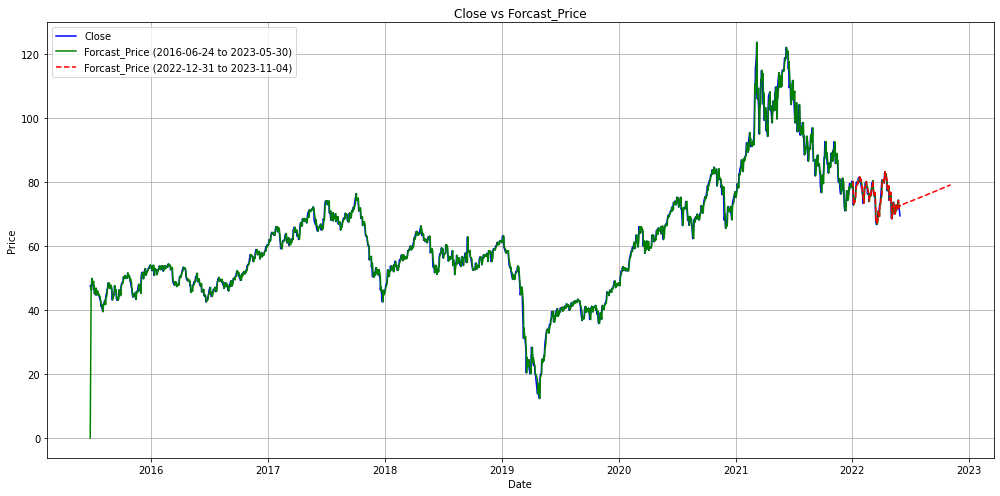

In [138]:
# 选择需要的数据范围
df_close_forecast = future_df.loc['2016-06-24':'2023-05-30', ['Close', 'Forcast_Price']]
df_forecast_only = future_df.loc['2022-12-31':'2023-11-04', 'Forcast_Price']

# 绘制图形
plt.figure(figsize=(14, 7))

# 从2016-06-24到2023-05-30的Close列
plt.plot(df_close_forecast.index, df_close_forecast['Close'], color='blue', label='Close')

# 从2016-06-24到2023-05-30的Forcast_Price列
plt.plot(df_close_forecast.index, df_close_forecast['Forcast_Price'], color='green', label='Forcast_Price (2016-06-24 to 2023-05-30)')

# 从2022-12-31到2023-11-04的Forcast_Price列
plt.plot(df_forecast_only.index, df_forecast_only, color='red', label='Forcast_Price (2022-12-31 to 2023-11-04)', linestyle='--')

# 其他绘图设置
plt.title('Close vs Forcast_Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 预测的结果可能就一般了 或许可以直接预测close

In [139]:
future_df.describe()

,Open,High,Low,Close,Adj Close,Log_Return,Forcast_log,Forcast_Price
count,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000,1.898000e+03,1898.000000
mean,62.145356,63.218460,60.998557,62.136155,62.136155,0.000533,5.381425e-04,63.276825
std,18.382076,18.765852,17.934130,18.354693,18.354693,0.030672,4.311588e-21,18.054486
min,12.960000,13.690000,10.070000,12.340000,12.340000,-0.282206,5.381425e-04,0.000000
25%,49.640001,50.417499,49.024999,49.697499,49.697499,-0.012144,5.381425e-04,50.554698
50%,59.090000,59.834999,58.184999,59.115000,59.115000,0.002436,5.381425e-04,61.503090
75%,71.947502,72.989998,70.927504,71.932499,71.932499,0.013881,5.381425e-04,74.561549
max,124.660004,130.500000,120.790001,123.699997,123.699997,0.319634,5.381425e-04,123.766583


count    1740.000000
mean        0.000533
std         0.030672
min        -0.282206
25%        -0.012144
50%         0.002436
75%         0.013881
max         0.319634
Name: Log_Return, dtype: float64


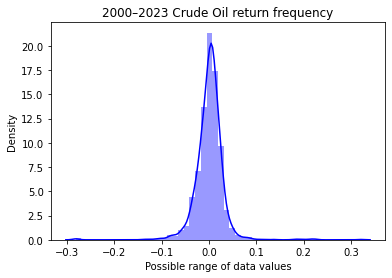

In [140]:
import seaborn as sns 

sns.distplot(df['Log_Return'], color='blue') #density plot 

plt.title('2000–2023 Crude Oil return frequency')
plt.xlabel('Possible range of data values')
# Pull up summary statistics
print(df['Log_Return'].describe())

In [ ]:
## --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [147]:
# calculate kurtosis and skewness  计算峰度（kurtosis）和偏度（skewness）
log_returns = df['Log_Return']
kurtosis_value = stats.kurtosis(log_returns)
skewness_value = stats.skew(log_returns)

# Display kurtosis and skewness
print(f'Log Return Kurtosis: {kurtosis_value:.2f}')
print(f'Log Return Skewness: {skewness_value:.2f}')

Log Return Kurtosis: 25.71
Log Return Skewness: 0.05


Kurtosis and skewness for standard normal distribution is 3 and 0. 
Great Kurtosis means the span of voltility is wide. 
Negative skewness means that the positive returns is more intense than negative returns.  

In [148]:

from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import DFGLS, PhillipsPerron, ZivotAndrews
from arch.unitroot import VarianceRatio

# Assuming you have a DataFrame df with a 'Log_Return' column
# You can replace 'Log_Return' with the actual column name you want to analyze
# 执行单位根检验（Unit Root Tests）
# 使用adfuller函数执行ADF检验，将'Log_Return'列作为输入，并打印ADF统计量、p值以及临界值。
# 使用kpss函数执行KPSS检验，同样将'Log_Return'列作为输入，并打印KPSS统计量、p值、使用的滞后阶数和临界值。
# 使用DFGLS对象执行DFGLS检验，
# 使用PhillipsPerron对象执行Phillips-Perron检验，
# 使用ZivotAndrews对象执行Zivot-Andrews检验，



# Perform ADF test
adf_result = adfuller(df['Log_Return'])
print("ADF Test:")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# Perform KPSS test
kpss_result = kpss(df['Log_Return'])
print("\nKPSS Test:")
print("KPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])
print("Lags Used:", kpss_result[2])
print("Critical Values:", kpss_result[3])

# Perform DFGLS test
dfgls_result = DFGLS(df['Log_Return'])
print("\nDFGLS Test:")
print(dfgls_result.summary().as_text())

# Perform Phillips-Perron test
pp_result = PhillipsPerron(df['Log_Return'])
print("\nPhillips-Perron Test:")
print(pp_result.summary().as_text())

# Perform Zivot-Andrews test
za_result = ZivotAndrews(df['Log_Return'])
print("\nZivot-Andrews Test:")
print(za_result.summary().as_text())

# Perform Variance Ratio test
vr_result = VarianceRatio(df['Log_Return'], lags=12)
print("\nVariance Ratio Test:")
print(vr_result.summary().as_text())

ADF Test:
ADF Statistic: -7.634926254903471
p-value: 1.9639064013176983e-11
Critical Values: {'1%': -3.434168725808674, '5%': -2.8632267535965252, '10%': -2.567667981283309}

KPSS Test:
KPSS Statistic: 0.05913503569679424
p-value: 0.1
Lags Used: 1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

DFGLS Test:
      Dickey-Fuller GLS Results      
Test Statistic                 -0.981
P-value                         0.301
Lags                               24
-------------------------------------

Trend: Constant
Critical Values: -2.58 (1%), -1.96 (5%), -1.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                -41.334
P-value                         0.000
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesi

In [150]:
from statsmodels.tsa.stattools import adfuller, kpss

# 执行ADF检验的自定义函数，它接受一个时间序列数据作为输入。
# 函数执行ADF检验并打印ADF统计量、p值、使用的滞后阶数以及观测值数量。
# 根据p值的结果，函数打印相应的结论，指示是否拒绝了单位根检验的空假设（时间序列的非平稳性）。

def adfuller_test(price):
    result = adfuller(price)
    label = ['ADF test statistics', 'p-value', 'lags', 'number of observations']
    for name, value in zip(label, result):
        print(name+": "+str(value))
    
    if result[1] < 0.05:
        print("Reject the Null hypothesis that the time series is not stationary, indeed it is stationary")
    else:
        print('Null hypothesis is true, the time series is NOT stationary')

adfuller_test(df['Log_Return'])


ADF test statistics: -7.634926254903471
p-value: 1.9639064013176983e-11
lags: 24
number of observations: 1715
Reject the Null hypothesis that the time series is not stationary, indeed it is stationary


VR tests was performed to test whether the return series is a pure random walk versus having some predictability. 

Non-linear dynamics:

Investigation on stationarity using H. The H provides a way to measure the amount by which a financial time series deviates from a random walk.

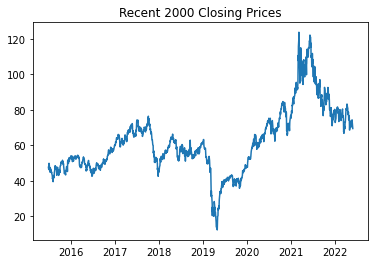

In [157]:
from numpy import std, subtract, sqrt, log, polyfit
# Get the recent 2000 closing prices
closes_recent = df['Close'][-2000:]

# Plot the recent closing prices
plt.plot(closes_recent)
plt.title('Recent 2000 Closing Prices')
plt.show()

[1.53464264 1.29057824 0.         1.29057824 1.53464264 1.68840273
 1.80191111 1.90549623 1.98890858 2.05005398 2.10774645 2.16218344
 2.2117417  2.25268267 2.29555655 2.33976242 2.38692827 2.42932317
 2.47422453 2.52148327 2.56738741 2.60518871]


Text(0.5, 1.0, 'Hurst')

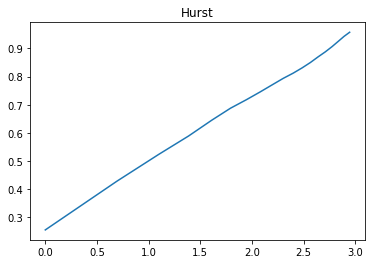

In [174]:

# calculate Hurst of recent prices
# lag1 = 2
# lags = range(lag1, 20)
# tau = [sqrt(std(subtract(closes_recent[lag:], closes_recent[:-lag]))) for lag in lags]
tau = []
lags = range(lag1, 20)
for lag in lags:
    # 计算滞后的差值
    diff_values = closes_recent.diff(periods=lag).dropna()  # 丢弃NaN值
    
    # 计算标准差
    std_value = diff_values.std()
    
    # 添加到tau列表
    tau.append(sqrt(std_value))
# 将tau转换为NumPy数组
tau = np.array(tau)
print(tau)

# Convert lags and tau to NumPy arrays
lags = np.array(lags)
tau = np.array(tau)

# Filter out tau values that are zero or negative
non_zero_indices = tau > 0
lags_filtered = lags[non_zero_indices]
tau_filtered = tau[non_zero_indices]

# Plot log(lags) vs. log(tau) for filtered values
plt.plot(log(lags_filtered), log(tau_filtered))

#plt.plot(log(lags), log(tau)); 
plt.title('Hurst')

In [176]:
# log(lags_filtered)包含NaN值，那么polyfit将无法正常工作。这可能是因为在滤波过程中，某些lags的值为0（因为log(0)是未定义的，会导致NaN）。
print(np.isnan(log(lags_filtered)).any())
print(np.isnan(log(tau_filtered)).any())
# m = polyfit(log(lags_filtered), log(tau_filtered), 1)
# hurst = m[0]*2
# print ('hurst = ', hurst)

True
False


In [178]:
positive_indices = (lags_filtered > 0) & (~np.isnan(tau_filtered))
lags_positive = lags_filtered[positive_indices]
tau_positive = tau_filtered[positive_indices]
log_lags = np.log(lags_positive)
log_tau = np.log(tau_positive)

m = polyfit(log_lags, log_tau, 1)
hurst = m[0]*2
print('hurst = ', hurst)


hurst =  0.463912400497446


# GARCH model:


In [179]:
X = 100* df['Log_Return']


fit an ARCH model and plot the squared residual to examine the auto correlation

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3863.30
Distribution:      Standardized Student's t   AIC:                           7740.59
Method:                  Maximum Likelihood   BIC:                           7778.82
                                              No. Observations:                 1740
Date:                      Sun, Oct 01 2023   Df Residuals:                     1739
Time:                              20:58:50   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

Text(0.5, 1.0, 'AutoCorrelation for 30 lags')

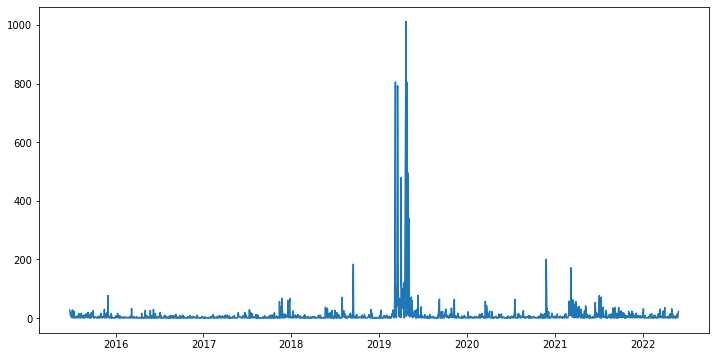

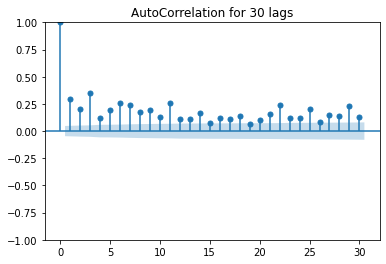

In [180]:
from arch import arch_model  # Import the arch_model function
from statsmodels.graphics.tsaplots import plot_acf

# Fit a model to your data (e.g., a GARCH(1,1) model)
model = arch_model(X, vol='Garch', p=2, q=2)

# Fit the model to estimate parameters
res = model.fit(disp='off')

# Get the residuals
residuals = res.resid
gam = arch_model(residuals, p=2, o=0, q=2, dist='StudentsT')
gres = gam.fit(update_freq=5, disp='off')
print(gres.summary())

# Plot the squared residuals
plt.figure(figsize=(12, 6))
plt.plot(gres.resid**2)

# Plot autocorrelation bars for up to 30 lags
plot_acf(gres.resid**2, lags=30)
plt.title('AutoCorrelation for 30 lags')

In [181]:
model = arch_model(X, p=2, q=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 7632.132129020922
Iteration:      2,   Func. Count:     22,   Neg. LLF: 64379.2556916583
Iteration:      3,   Func. Count:     33,   Neg. LLF: 5212.396763605333
Iteration:      4,   Func. Count:     43,   Neg. LLF: 4755.414809199441
Iteration:      5,   Func. Count:     52,   Neg. LLF: 3956.7871722687487
Iteration:      6,   Func. Count:     61,   Neg. LLF: 3972.14821525715
Iteration:      7,   Func. Count:     70,   Neg. LLF: 3940.349918270326
Iteration:      8,   Func. Count:     79,   Neg. LLF: 3964.2836120599395
Iteration:      9,   Func. Count:     88,   Neg. LLF: 3941.194534935708
Iteration:     10,   Func. Count:     97,   Neg. LLF: 3996.2075808950376
Iteration:     11,   Func. Count:    106,   Neg. LLF: 3938.0308318250245
Iteration:     12,   Func. Count:    114,   Neg. LLF: 3937.9623441871363
Iteration:     13,   Func. Count:    122,   Neg. LLF: 3937.931138607211
Iteration:     14,   Func. Count:    130,   Neg. LLF: 3937.92

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3937.93
Distribution:                  Normal   AIC:                           7889.86
Method:            Maximum Likelihood   BIC:                           7928.09
                                        No. Observations:                 1740
Date:                Sun, Oct 01 2023   Df Residuals:                     1739
Time:                        20:58:52   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0888  5.190e-02      1.711  8.716e-02 [-1.294e-02,  0.191]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3973      0.672      0.592      0.554   [ -0.919,  1.714]
alpha[1]       0.1589  4.503e-02      3.530  4.162e-04 [7.068e-02,  0.247]
alpha[2]       0.0375      0.329      0.114      0.909   [ -0.607,  0.682]
beta[1]        0.2633      1.920      0.137      0.891   [ -3.499,  4.026]
beta[2]        0.4865      0.771      0.631      0.528   [ -1.025,  1.998]
beta[3]    6.3572e-17      0.755  8.417e-17      1.000   [ -1.480,  1.480]
==========================================================================

Covariance estimator: robust
"""

In [182]:
am = arch_model(X, p=2, q=3, vol='Garch', dist='StudentsT')
res = am.fit()
print(res.summary())
eam = arch_model(X, p=2,q=3, vol='EGARCH', dist='StudentsT')
eres = eam.fit()
print(res.summary())
gjam = arch_model(X, p=2, q=3, dist='StudentsT')
gjres = gjam.fit()
print(gjres.summary())

Iteration:      1,   Func. Count:     10,   Neg. LLF: 10355.161085541615
Iteration:      2,   Func. Count:     23,   Neg. LLF: 44557.29640219832
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4204.364787396582
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4175.098607484833
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5372.918219048099
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4108.250628413669
Iteration:      7,   Func. Count:     78,   Neg. LLF: 3863.0133499027684
Iteration:      8,   Func. Count:     87,   Neg. LLF: 3869.245706780594
Iteration:      9,   Func. Count:     97,   Neg. LLF: 3862.9483865407747
Iteration:     10,   Func. Count:    107,   Neg. LLF: 3862.8594574066415
Iteration:     11,   Func. Count:    116,   Neg. LLF: 3862.8570611945943
Iteration:     12,   Func. Count:    125,   Neg. LLF: 3862.857016245991
Iteration:     13,   Func. Count:    134,   Neg. LLF: 3862.857013533345
Iteration:     14,   Func. Count:    142,   Neg. LLF: 3862.

In [183]:
from arch import arch_model  # Import the arch_model function

model = arch_model(X, p=2,q=3, vol='EGARCH', dist='StudentsT')
results = model.fit()
arima_residuals = results.resid


Iteration:      1,   Func. Count:     10,   Neg. LLF: 43458.03890214102
Iteration:      2,   Func. Count:     24,   Neg. LLF: 19899.669340513203
Iteration:      3,   Func. Count:     36,   Neg. LLF: 24382.69659870794
Iteration:      4,   Func. Count:     49,   Neg. LLF: 14552.799711121108
Iteration:      5,   Func. Count:     60,   Neg. LLF: 31609.11894872046
Iteration:      6,   Func. Count:     71,   Neg. LLF: 3875.5748110468303
Iteration:      7,   Func. Count:     81,   Neg. LLF: 3917.7543355839007
Iteration:      8,   Func. Count:     91,   Neg. LLF: 3866.698745715178
Iteration:      9,   Func. Count:    100,   Neg. LLF: 3866.295050139172
Iteration:     10,   Func. Count:    109,   Neg. LLF: 3866.2162966316096
Iteration:     11,   Func. Count:    118,   Neg. LLF: 3866.175012667644
Iteration:     12,   Func. Count:    127,   Neg. LLF: 3866.1746570709474
Iteration:     13,   Func. Count:    136,   Neg. LLF: 3866.174516180723
Iteration:     14,   Func. Count:    145,   Neg. LLF: 3866

In [184]:
std_resid = arima_residuals / results.conditional_volatility
unit_var_resid = arima_residuals / arima_residuals.std()


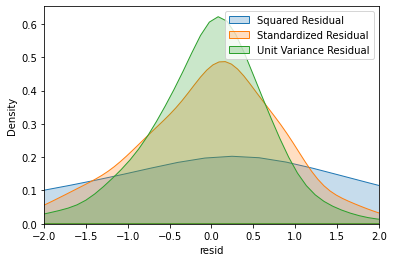

In [185]:
plt.xlim(-2, 2)

# Plot KDEs for squared_resid, std_resid, and unit_var_resid
sns.kdeplot(arima_residuals, shade=True, label='Squared Residual')
sns.kdeplot(std_resid, shade=True, label='Standardized Residual')
sns.kdeplot(unit_var_resid, shade=True, label='Unit Variance Residual')

# Add a legend
plt.legend(['Squared Residual', 'Standardized Residual', 'Unit Variance Residual'], loc='best')

# Show the plot
plt.show()

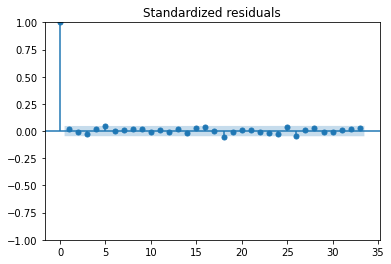

In [186]:
plot_acf(std_resid)
plt.title('Standardized residuals')
plt.show()

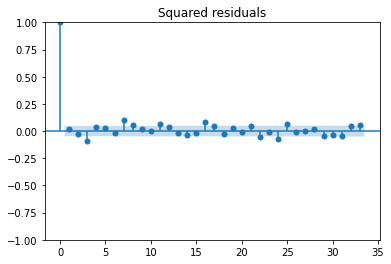

In [187]:
plot_acf(arima_residuals)
plt.title('Squared residuals')
plt.show()

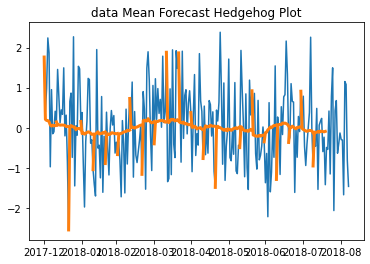

In [188]:
# Simulate data
np.random.seed(0)
simulated_data = np.random.randn(250)  # Replace with your own data

# Create a DataFrame with a date index
date_index = pd.date_range('2018-01-01', periods=250)
sim_data = pd.DataFrame({'data': simulated_data}, index=date_index)

# Specify the HAR (Heterogeneous Autoregressive) model with Constant volatility
am = arch_model(sim_data['data'], mean='HAR', lags=[1, 5, 22], vol='Constant')

# Fit the model
res = am.fit()

# Create a hedgehog plot for the conditional mean
fig = res.hedgehog_plot(type='mean')

# Show the hedgehog plot
plt.show()

In [189]:
mu = df['Log_Return'].mean()
print(mu) 

0.0005334518461128549


In [190]:
vol = df['Log_Return'].std()*sqrt(252)
print ('Annual Volatility =', str(round(vol,4)*100)+'%')

Annual Volatility = 48.69%


In [194]:
vol = df['Log_Return'].std()*sqrt(252)
print ('Annual Volatility =', str(round(vol,4)*100)+'%')
# Define Variables
S = df['Close'][-1]  # starting stock price (i.e. last available real stock price)
T = 252  # Number of trading days
mu = 0.0622  # Return
vol = 0.3737  # Volatility

# Generate daily returns
daily_returns = np.random.normal((1+mu)**(1/T), vol/sqrt(T), T)

# Simulate price
price_list = [S]
for x in daily_returns:
    price_list.append(price_list[-1] * (1 + x))
#Generate Plots — price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) 
plt.show()

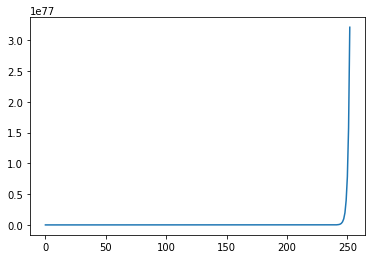

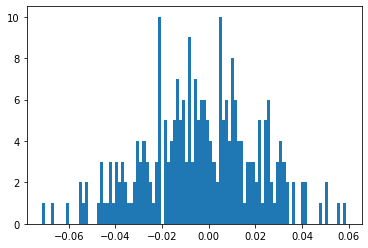

Annual Volatility = 593.2304%


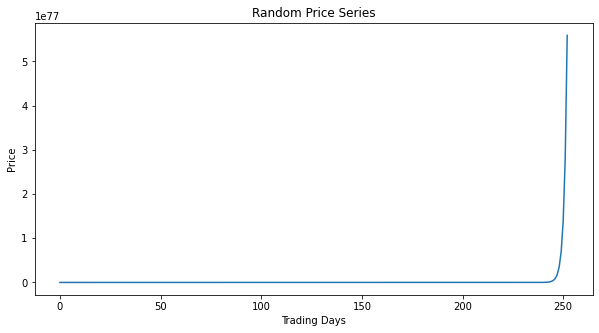

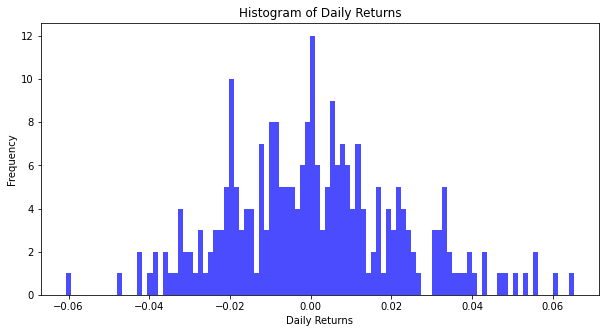

In [197]:

# Define Variables
S = df['Close'].iloc[-1]  # Starting stock price (use .iloc to get the last available price)
T = 252  # Number of trading days
mu = 0.0622  # Return
vol = 0.3737  # Volatility

# Calculate annualized volatility
annual_volatility = vol * np.sqrt(252)
print('Annual Volatility =', f'{annual_volatility:.4%}')

# Generate daily returns using a random normal distribution
daily_returns = np.random.normal((1 + mu) ** (1 / T), vol / np.sqrt(T), T)

# Initialize a list to store the price series
price_list = [S]

# Generate the price series based on daily returns
for daily_return in daily_returns:
    price_list.append(price_list[-1] * (1 + daily_return))

# Generate Plots - Price Series
plt.figure(figsize=(10, 5))
plt.plot(price_list)
plt.xlabel('Trading Days')
plt.ylabel('Price')
plt.title('Random Price Series')
plt.show()

# Generate Plots - Histogram of Daily Returns
plt.figure(figsize=(10, 5))
plt.hist(daily_returns - 1, bins=100, color='blue', alpha=0.7)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')
plt.show()

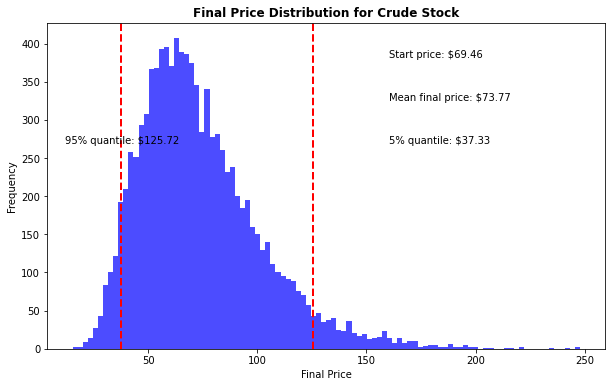

In [198]:
# Set up an empty list to hold ending values for each simulated price series
results = []

# Define parameters
S = df['Close'].iloc[-1]  # Starting stock price (use .iloc to get the last available price)
T = 252  # Number of trading days
mu = 0.0622  # Expected return
vol = 0.3737  # Volatility

# Choose the number of runs to simulate (e.g., 10,000)
num_simulations = 10000

for i in range(num_simulations):
    # Create a list of daily returns using a random normal distribution
    daily_returns = np.random.normal((1 + mu) ** (1 / T), vol / np.sqrt(T), T)
    
    # Set the starting price and create a price series generated by the above daily returns
    price_list = [S]

    for daily_return in daily_returns:
        price_list.append(price_list[-1] * daily_return)
    
    # Append the ending value of each simulated run to the results list
    results.append(price_list[-1])

# Create a histogram of the simulated results
plt.figure(figsize=(10, 6))
plt.hist(results, bins=100, color='blue', alpha=0.7)

# Add vertical lines at the 5th and 95th percentiles
plt.axvline(np.percentile(results, 5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(results, 95), color='r', linestyle='dashed', linewidth=2)

# Add statistics text to the plot
plt.figtext(0.6, 0.8, f"Start price: ${S:.2f}")
plt.figtext(0.6, 0.7, f"Mean final price: ${np.mean(results):.2f}")
plt.figtext(0.6, 0.6, f"5% quantile: ${np.percentile(results, 5):.2f}")
plt.figtext(0.15, 0.6, f"95% quantile: ${np.percentile(results, 95):.2f}")

# Set plot title and labels
plt.title("Final Price Distribution for Crude Stock", weight='bold', fontsize=12)
plt.xlabel("Final Price")
plt.ylabel("Frequency")

# Show the plot
plt.show()

15-day VaR at 5.0% confidence level: $36.99


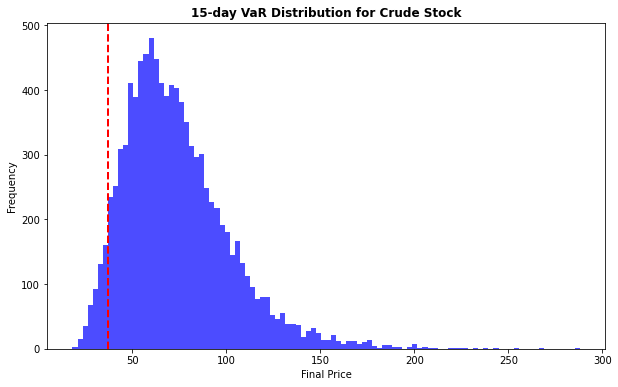

In [199]:
# Set up an empty list to hold ending values for each simulated price series
results = []

# Define parameters
S = df['Close'].iloc[-1]  # Starting stock price (use .iloc to get the last available price)
T = 15  # Number of trading days for the desired horizon
mu = 0.0622  # Expected return
vol = 0.3737  # Volatility

# Choose the number of runs to simulate (e.g., 10,000)
num_simulations = 10000

for i in range(num_simulations):
    # Create a list of daily returns for the desired horizon
    daily_returns = np.random.normal((1 + mu) ** (1 / T), vol / np.sqrt(T), T)
    
    # Set the starting price and create a price series generated by the daily returns
    price_list = [S]

    for daily_return in daily_returns:
        price_list.append(price_list[-1] * daily_return)
    
    # Append the ending value of each simulated run to the results list
    results.append(price_list[-1])

# Create a histogram of the simulated results
plt.figure(figsize=(10, 6))
plt.hist(results, bins=100, color='blue', alpha=0.7)

# Calculate and display VaR at the desired confidence level
confidence_level = 0.05  # 5% confidence level (adjust as needed)
var_horizon = np.percentile(results, confidence_level * 100)
print(f"{int(T)}-day VaR at {confidence_level * 100}% confidence level: ${var_horizon:.2f}")

# Add a vertical line at the VaR level
plt.axvline(var_horizon, color='r', linestyle='dashed', linewidth=2)

# Set plot title and labels
plt.title(f"{int(T)}-day VaR Distribution for Crude Stock", weight='bold', fontsize=12)
plt.xlabel("Final Price")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [200]:
df.index

DatetimeIndex(['2016-06-24', '2016-06-27', '2016-06-28', '2016-06-29',
               '2016-06-30', '2016-07-01', '2016-07-05', '2016-07-06',
               '2016-07-07', '2016-07-08',
               ...
               '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19',
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-30'],
              dtype='datetime64[ns]', name='Date', length=1740, freq=None)

In [208]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Log_Return',
       'Forcast_log', 'Forcast_Price', 'Short_MA', 'Long_MA', 'Position',
       'Capital', 'Returns'],
      dtype='object')

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [212]:
def backtest_strategy(df, short_window, long_window):
    # 计算短期均线和长期均线
    df['Short_MA'] = df['Close'].rolling(window=short_window).mean()
    df['Long_MA'] = df['Close'].rolling(window=long_window).mean()

    # 初始化持仓和资本
    df['Position'] = 0
    df['Capital'] = 100000  # 假设初始资本为100,000美元
    initial_capital = df['Capital'][0]  # 定义初始资本

    # 实施交易策略
    for i in range(long_window, len(df)):
        if df['Short_MA'][i] > df['Long_MA'][i] and df['Short_MA'][i - 1] <= df['Long_MA'][i - 1]:
            # 买入信号
            df.at[df.index[i], 'Position'] = df['Capital'][i - 1] // df['Close'][i]
        elif df['Short_MA'][i] < df['Long_MA'][i] and df['Short_MA'][i - 1] >= df['Long_MA'][i - 1]:
            # 卖出信号
            df.at[df.index[i], 'Position'] = 0

    # 计算每日资本
    for i in range(long_window, len(df)):
        df.at[df.index[i], 'Capital'] = df['Capital'][i - 1] + df['Position'][i] * (df['Close'][i] - df['Close'][i - 1])

    # 计算策略的回报
    df['Returns'] = df['Capital'] - initial_capital

    return df

Total Returns: 19.92%
Annualized Returns: 2.89%


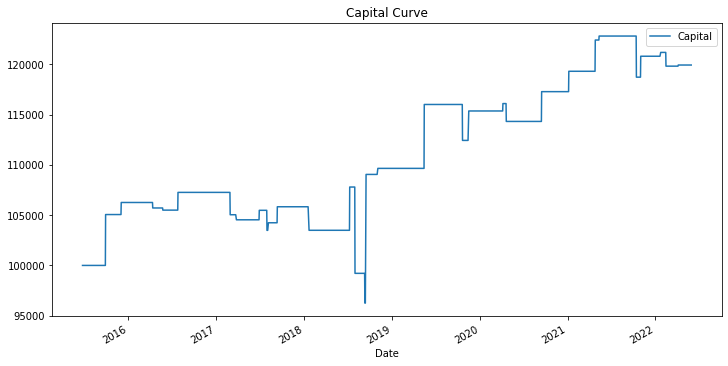

In [213]:
short_window = 10  # 短期均线窗口
long_window = 50   # 长期均线窗口

df_backtest = backtest_strategy(df, short_window, long_window)

# 打印回报统计信息
initial_capital = df_backtest['Capital'][0]  # 定义初始资本
print("Total Returns: {:.2f}%".format(df_backtest['Returns'][-1] / initial_capital * 100))
print("Annualized Returns: {:.2f}%".format((df_backtest['Returns'][-1] / initial_capital) / (len(df_backtest) / 252) * 100))

# 绘制资本曲线
df_backtest[['Capital']].plot(figsize=(12, 6))
plt.title("Capital Curve")
plt.show()